In [1]:
import os

In [2]:
imdb_dir = '/home/dave/Downloads/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [4]:
# Tokenizing the text of the raw IMDB data

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [5]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [6]:
sequences

[[157,
  84,
  17,
  31,
  42,
  3,
  84,
  2974,
  4,
  1,
  901,
  6,
  4517,
  931,
  2,
  1,
  175,
  3840,
  8,
  4517,
  295,
  2410,
  1,
  2306,
  235,
  39,
  235,
  21,
  27,
  1853,
  18,
  9,
  6,
  3,
  189,
  12,
  1,
  175,
  13,
  1679,
  571,
  8,
  2,
  1422,
  4,
  4517,
  295,
  7,
  7,
  463,
  11,
  148,
  1,
  1100,
  4,
  1,
  17,
  1157,
  1,
  797,
  4201,
  2454,
  4,
  1,
  1040,
  322,
  996,
  6,
  3,
  70,
  570,
  4201,
  2,
  24,
  99,
  23,
  207,
  5340,
  15,
  459,
  26,
  2419,
  1,
  175,
  1724,
  14,
  1763,
  2,
  134,
  8422,
  4939,
  14,
  139,
  1120,
  7,
  7,
  14,
  9,
  676,
  43,
  9,
  13,
  3,
  9878,
  15,
  2,
  1,
  357,
  4,
  1,
  4517,
  931,
  12,
  1,
  175,
  185,
  571,
  2373,
  6,
  1058,
  16,
  335,
  2916,
  1866,
  8058,
  10,
  112,
  553,
  4,
  335,
  39,
  536,
  529,
  5341,
  14,
  9,
  567,
  8,
  88,
  2916,
  1866,
  3108,
  1,
  175,
  13,
  993,
  3,
  1636,
  322,
  2,
  555,
  8288,
  175,
  29,
  1,
  96

In [7]:
len(sequences)

25000

In [8]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [9]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [10]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [11]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [12]:
embedding_dim = 100

In [13]:
# Model definition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [14]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training and evaluation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 15ms/sample - loss: 0.6937 - acc: 0.4950 - val_loss: 0.6922 - val_acc: 0.5215
Epoch 2/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.4978 - acc: 1.0000 - val_loss: 0.7137 - val_acc: 0.5063
Epoch 3/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.2883 - acc: 0.9850 - val_loss: 0.7040 - val_acc: 0.5172
Epoch 4/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.1224 - acc: 1.0000 - val_loss: 0.7124 - val_acc: 0.5150
Epoch 5/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0573 - acc: 1.0000 - val_loss: 0.7244 - val_acc: 0.5178
Epoch 6/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0293 - acc: 1.0000 - val_loss: 0.7116 - val_acc: 0.5286
Epoch 7/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0160 - acc: 1.0000 - val_loss: 0.7094 - val_acc: 0.5309
Epoch 8/10
20

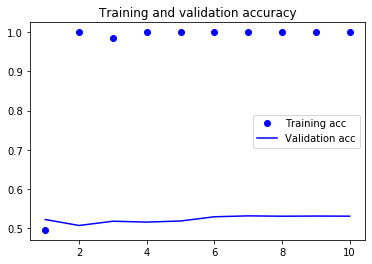

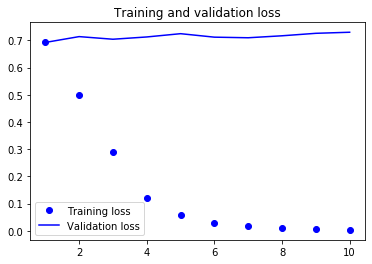

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
# Tokenizing the data of the test set

test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [25]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [28]:
# Evaluating the model on the test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 94us/sample - loss: 0.7586 - acc: 0.5242


[0.7586091925811768, 0.52416]

In [21]:
len(val_loss)

10